In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
# convert job_skills STR type to LIST type
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Creating dataframe for Data Analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [ ]:
df_DA

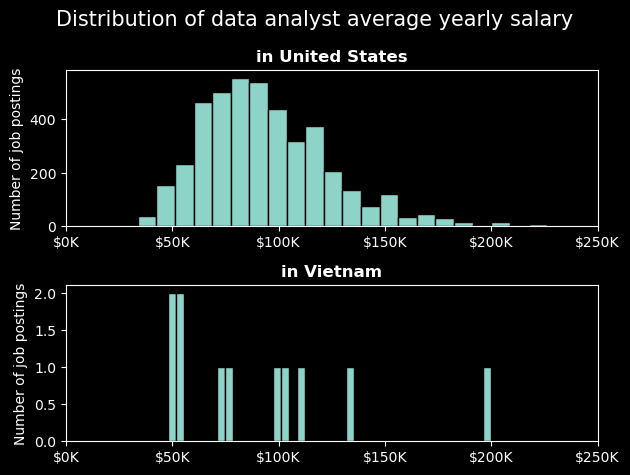

In [20]:
country_list = ['United States', 'Vietnam']

# Set dark background style
plt.style.use('dark_background')

fig, ax = plt.subplots(2,1)
for i, country in enumerate(country_list):
    df_final = df_DA[df_DA['job_country']== country]
    df_final['salary_year_avg'].plot(kind = 'hist', ax=ax[i], edgecolor = 'black', bins=40)

    ax[i].set_title(f'in {country}', fontweight = 'bold')
    ax[i].set_ylabel('Number of job postings')                
    ax[i].set_xlim(0, 250_000)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.suptitle('Distribution of data analyst average yearly salary', fontsize=15)
figsize = (10,15)
fig.tight_layout()